<a href="https://colab.research.google.com/github/rumman-adnan/Assignment-Sensors-Data/blob/main/sensors_data_analytics_LSTM_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



### Import Data

In [4]:
train_data = np.load('/content/drive/MyDrive/Python work/sim_data/simu_20000_0.1_90_140_train.npy')
test_data = np.load('/content/drive/MyDrive/Python work/sim_data/simu_10000_0.1_141_178_test.npy')

print("The shape of trained data is: ",train_data.shape)
print("The shape of tested data is: ",test_data.shape)

The shape of trained data is:  (20000, 1006)
The shape of tested data is:  (10000, 1006)


### Feature Extraction

In [5]:
# Extraction of features and targets

# Training features and targets
X_train_lstm = train_data[:, :1000]
Y_train_lstm = train_data[:, -2:]

# Testing features and targets
X_test_lstm = test_data[:, :1000]
Y_test_lstm = test_data[:, -2:]

# Reshaping data for LSTM
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)


### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the scalers
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scaling the features
X_train_scaled = feature_scaler.fit_transform(X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1]))
X_test_scaled = feature_scaler.transform(X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1]))
X_train_scaled = X_train_scaled.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

# Scaling the targets
Y_train_scaled = target_scaler.fit_transform(Y_train_lstm)
Y_test_scaled = target_scaler.transform(Y_test_lstm)





# Scaling features
X_train_scaled = feature_scaler.fit_transform(X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1]))
X_test_scaled = feature_scaler.transform(X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1]))
X_train_scaled = X_train_scaled.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

# Scaling targets
Y_train_scaled = target_scaler.fit_transform(Y_train_lstm)
Y_test_scaled = target_scaler.transform(Y_test_lstm)

X_train_scaled.shape, X_test_scaled.shape, Y_train_scaled.shape, Y_test_scaled.shape


((20000, 1000, 1), (10000, 1000, 1), (20000, 2), (10000, 2))

### Train LSTM algorithm with 10 epochs

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='tanh', recurrent_activation='sigmoid', input_shape=(X_train_scaled.shape[1], 1)))
model_lstm.add(Dense(50, activation='relu'))
model_lstm.add(Dense(2))  # Two output units for S and D

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])


# for epoch in range(1):  # Maximum epochs
print(f"\nEpoch {epoch+1}/20")

# Train the model
model_lstm.fit(X_train_scaled, Y_train_lstm, batch_size=32, epochs=10, verbose=1) # Use scaled features and original target values
# validation_data=(X_test_scaled, Y_test_scaled)

# Evaluate the model's performance on the test set
predictions = model_lstm.predict(X_test_scaled)
mae_scores = mean_absolute_error(Y_test_lstm, predictions, multioutput='raw_values')
print(f"Mean Absolute Error for S: {mae_scores[0]}, for D: {mae_scores[1]}")







Epoch 1/20
Epoch 1/10
625/625 [==============================] - 17s 24ms/step - loss: 2287.9363 - accuracy: 0.9737
Epoch 2/10
625/625 [==============================] - 15s 24ms/step - loss: 178.1137 - accuracy: 0.9737
Epoch 3/10
625/625 [==============================] - 15s 24ms/step - loss: 178.1451 - accuracy: 0.9737
Epoch 4/10
625/625 [==============================] - 15s 24ms/step - loss: 178.2222 - accuracy: 0.9737
Epoch 5/10
625/625 [==============================] - 15s 24ms/step - loss: 178.2427 - accuracy: 0.9737
Epoch 6/10
625/625 [==============================] - 15s 24ms/step - loss: 178.3931 - accuracy: 0.9737
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 178.3318 - accuracy: 0.9737
Epoch 8/10
625/625 [==============================] - 15s 24ms/step - loss: 178.3985 - accuracy: 0.9737
Epoch 9/10
625/625 [==============================] - 15s 23ms/step - loss: 178.4402 - accuracy: 0.9737
Epoch 10/10
313/313 [==============================

In [25]:
predictions

array([[113.89214 ,  78.512535],
       [113.89334 ,  78.51337 ],
       [113.89099 ,  78.51175 ],
       ...,
       [113.8893  ,  78.51058 ],
       [113.88911 ,  78.510445],
       [113.8879  ,  78.50963 ]], dtype=float32)

### Plot the output

313/313 [==============================] - 3s 11ms/step


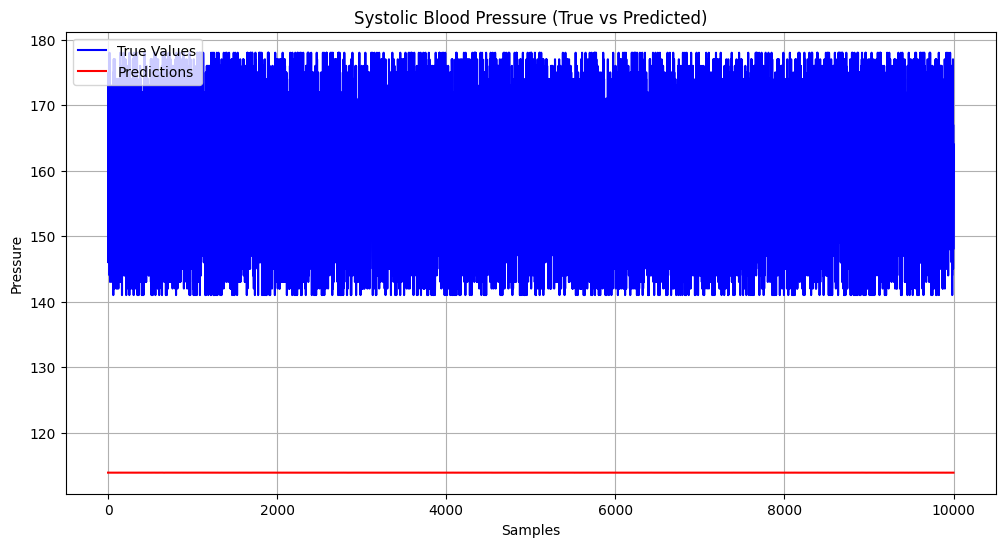

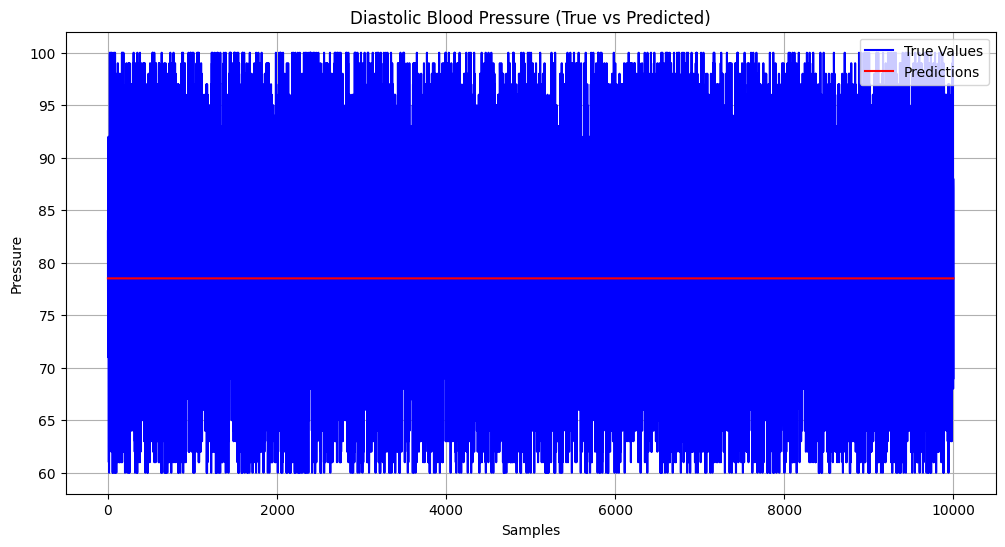

In [26]:
import matplotlib.pyplot as plt

def plot_2vectors(labels, predictions, title, xlabel, ylabel, save_as):
    """
    Plot two vectors (labels vs. predictions).
    """
    plt.figure(figsize=(12, 6))
    plt.plot(labels, 'b-', label='True Values')
    plt.plot(predictions, 'r-', label='Predictions')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig(save_as)
    plt.show()

# Use the LSTM model to predict on the test data
predictions = model_lstm.predict(X_test_scaled)

# Extracting the Systolic (S) and Diastolic (D) predictions
systolic_predictions = predictions[:, 0]
diastolic_predictions = predictions[:, 1]

# Plotting the results
plot_2vectors(Y_test_lstm[:, 0], systolic_predictions, "Systolic Blood Pressure (True vs Predicted)", "Samples", "Pressure", "systolic_plot.png")
plot_2vectors(Y_test_lstm[:, 1], diastolic_predictions, "Diastolic Blood Pressure (True vs Predicted)", "Samples", "Pressure", "diastolic_plot.png")


### Training LSTM for more epochs

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='tanh', recurrent_activation='sigmoid', input_shape=(X_train_scaled.shape[1], 1)))
model_lstm.add(Dense(50, activation='relu'))
model_lstm.add(Dense(2))  # Two output units for S and D

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='mean_squared_error')

# Training the LSTM model
desired_mae = 3
best_mae = float('inf')
patience = 10  # Number of epochs to wait if no improvement before stopping
wait = 0

for epoch in range(50):  # Maximum epochs
    print(f"\nEpoch {epoch+1}/50")

    # Train the model
    model_lstm.fit(X_train_scaled, Y_train_lstm, batch_size=32, epochs=5, verbose=1)

    # Evaluate the model's performance on the test set
    predictions = model_lstm.predict(X_test_scaled)
    mae_scores = mean_absolute_error(Y_test_lstm, predictions, multioutput='raw_values')
    print(f"Mean Absolute Error for S: {mae_scores[0]}, for D: {mae_scores[1]}")

    # Early stopping based on desired MAE
    if mae_scores[0] <= desired_mae and mae_scores[1] <= desired_mae:
        print("Desired MAE achieved. Stopping training.")
        break

    # Implementing patience for early stopping
    if mae_scores[0] < best_mae or mae_scores[1] < best_mae:
        best_mae = min(mae_scores)
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"MAE did not improve for {patience} consecutive epochs. Stopping training.")
            break


Epoch 1/50
Epoch 1/5
625/625 [==============================] - 16s 24ms/step - loss: 1663.7238
Epoch 2/5
625/625 [==============================] - 15s 23ms/step - loss: 178.1853
Epoch 3/5
625/625 [==============================] - 15s 23ms/step - loss: 178.2614
Epoch 4/5
625/625 [==============================] - 15s 24ms/step - loss: 178.3110
Epoch 5/5
313/313 [==============================] - 4s 11ms/step
Mean Absolute Error for S: 45.127821153259276, for D: 10.217588119506836

Epoch 2/50
Epoch 1/5
625/625 [==============================] - 15s 24ms/step - loss: 178.4310
Epoch 2/5
625/625 [==============================] - 15s 24ms/step - loss: 178.5567
Epoch 3/5
625/625 [==============================] - 15s 24ms/step - loss: 178.6699
Epoch 4/5
625/625 [==============================] - 15s 24ms/step - loss: 178.7035
Epoch 5/5
313/313 [==============================] - 3s 11ms/step
Mean Absolute Error for S: 44.122967997741696, for D: 10.212909800720215

Epoch 3/50
Epoch 1/5
625

KeyboardInterrupt: ignored

- After tunning featuers and run 20 epochs, so i stop by keyboard interupt, MAE is not decreasing, we will try other algorithms